In [1]:
import pandas as pd
import numpy as np
import torch
import warnings
import sys, os

sys.path.append(os.path.abspath('..'))

ais_tracks_path = '../../data/tracks_ais.csv'
cleaned_detections_path = '../../data/cleaned_data/preprocessed_radar_detections.csv'
ais_tracks = pd.read_csv(ais_tracks_path)
radar_detections = pd.read_csv(cleaned_detections_path)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

/Users/liuzehan/miniconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Using device: mps


In [4]:
from core.vessel_agg import VesselTypeAggregator
vessel_aggregator = VesselTypeAggregator()
vessel_aggregator.aggregate_vessel_type(radar_detections)


In [5]:
radar_detections['type_m2_agg'].unique()

array(['tug/tow', 'fishing_boat', 'cargo/tanker', 'passenger_ship',
       'class_b', 'other', 'military_ship'], dtype=object)

/Users/liuzehan/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/liuzehan/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/liuzehan/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/liuzehan/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

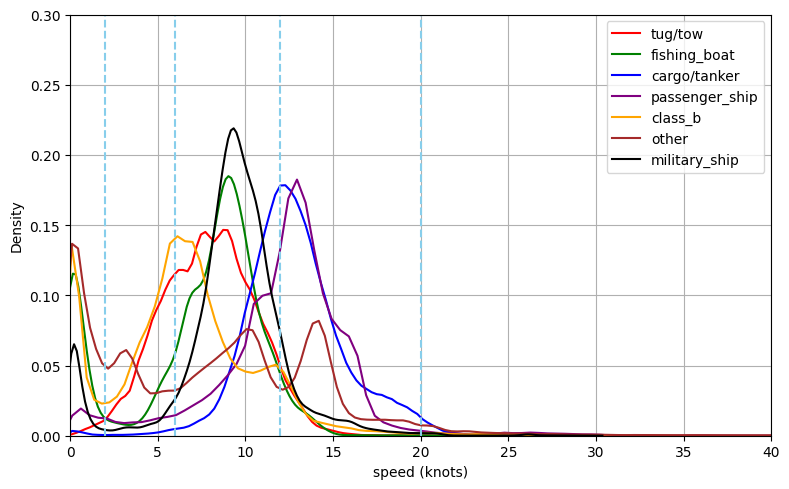

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for each vessel type
colors = {
    'tug/tow': 'red',
    'fishing_boat': 'green',
    'cargo/tanker': 'blue',
    'passenger_ship': 'purple',
    'class_b': 'orange',
    'other': 'brown',
    'military_ship': 'black'
}

# Set up the plot
plt.figure(figsize=(8, 5))

# Loop over each type and plot the KDE
for vessel_type, color in colors.items():
    subset = radar_detections[radar_detections['type_m2_agg'] == vessel_type]
    if not subset['speed'].empty:
        sns.kdeplot(
            subset['speed'],
            bw_adjust=1,
            color=color,
            label=vessel_type,
            linewidth=1.5
        )

# Optional: add vertical dashed lines at specific thresholds
for x in [2, 6, 12, 20]:
    plt.axvline(x=x, linestyle='--', color='skyblue')

# Labeling
plt.xlabel("speed (knots)")
plt.ylabel("Density")
plt.xlim(0, 40)
plt.ylim(0, 0.3)  # Adjust if needed based on KDE curves
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/liuzehan/Desktop/Protected Seas/peter/core/track_plot.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


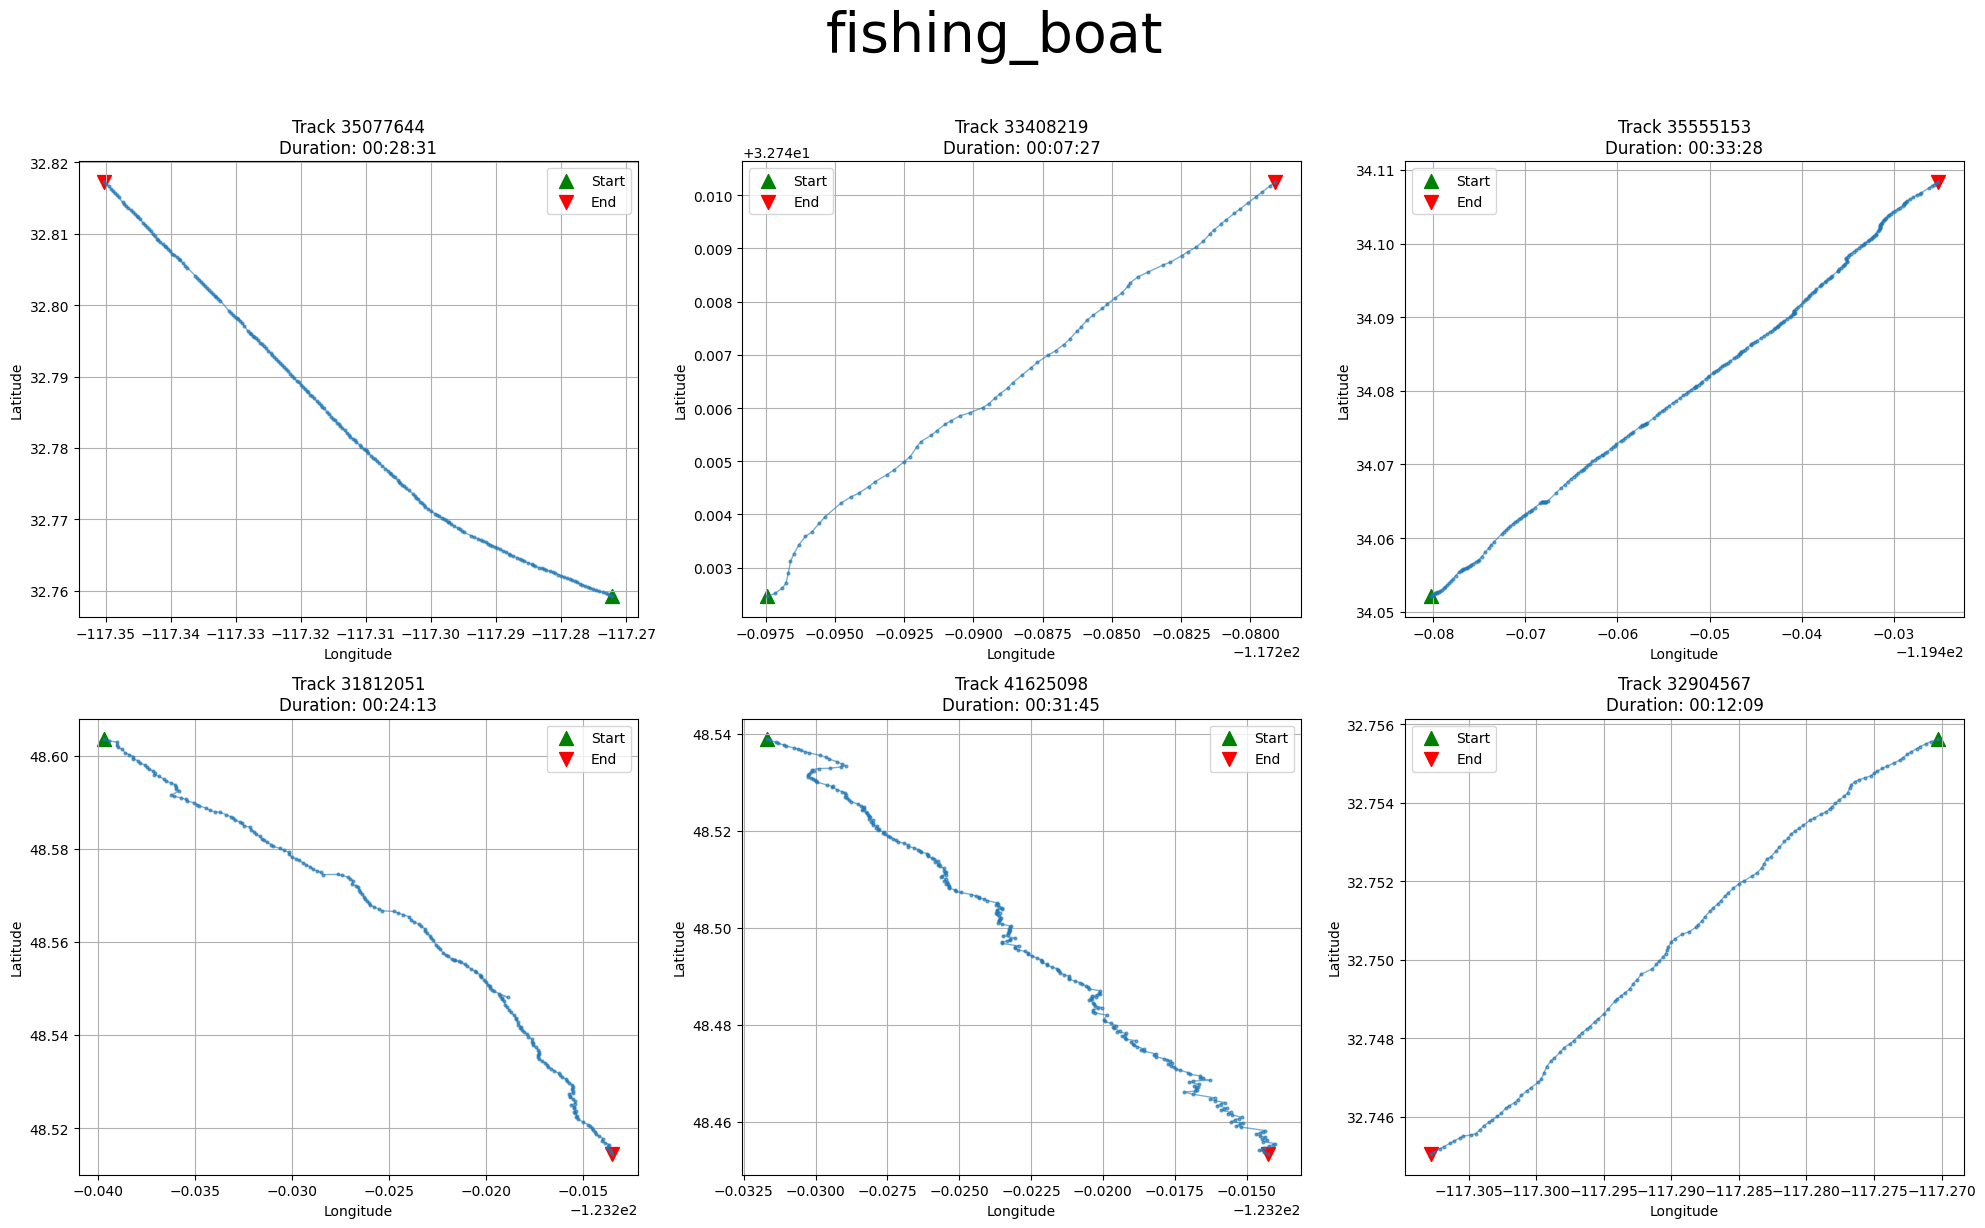

In [18]:
from core.track_plot import plot_type_trajectory

plot_type_trajectory('fishing_boat', radar_detections = radar_detections)